# Dynamical Process in Complex Networks
## Assignment- 1

### Name: KARTIK VIJ
### ROLL NUMBER: 2022102060

#### Network Chosen: Zachary Karate Club

In [16]:
import networkx as nx

# Preprocess to skip comment/header lines
edges = []
with open('Networks/out.ucidata-zachary', 'r', encoding='utf-8') as fin:
    for line in fin:
        line = line.strip()
        if not line or line.startswith('%') or line.startswith('#'):
            continue
        toks = line.split()
        ints = []
        for t in toks:
            try:
                ints.append(int(t))
            except Exception:
                try:
                    ints.append(int(t.strip(' ,;()[]')))
                except Exception:
                    continue
            if len(ints) >= 2:
                break
        if len(ints) >= 2:
            edges.append((ints[0], ints[1]))

G = nx.Graph()
G.add_edges_from(edges)
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes:", n)
print("Number of edges:", m)

Number of nodes: 34
Number of edges: 78


## Question 1.a


1. Edge betweenness Centrality:

Betweenness centrality of an edge $e$ is the sum of the fraction of all-pairs shortest paths that pass through $e$.

$$
c_B(e)=\sum_{s,t\in V}\frac{\sigma(s,t\mid e)}{\sigma(s,t)}
$$

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t\mid e)$ is the number of those paths passing through edge $e$.

2. Edge Strength:
For unweighted networks, it is typically the sum of the degrees of the two nodes connected by the edge.

3. Vertex Betweenness Centrality:
Betweenness centrality of a vertex $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$.
$$
c_B(v)=\sum_{s,t\in V}\frac{\sigma(s,t\mid v)}{\sigma(s,t)}
$$

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t\mid v)$ is the number of those paths passing through vertex $v$ other than $s,t$. If $s$ = $t$, $\sigma(s,t)$ = 1, and if $v \in \{s,t\}, \; \sigma(s,t \mid v) = 0$

4. Vertex Closeness Centrality: Vertex closeness centrality measures how efficiently a node can reach all other nodes in a network by calculating the reciprocal of the sum of the shortest path distances to all other nodes.
$$
C_C(v) = \frac{V-1}{\sum_{t \in V \setminus \{v\}} d(v,t)}
$$

5. Vertex Strength: Defined as the sum of the weights of all edges incident to a given vertex.
$$
C_v^S(q) = \sum_{x} w_{qx}
$$

6. Vertex Eigenvector Centrality: Eigenvector centrality of vertex $q$ is defined as the $q$-th entry of the eigenvector $\vec{v}$ corresponding to the dominant eigenvalue $\lambda\_{\max}$ of matrix $M$, which can be derived from the eigenvector equation

$$
M^{(v)}\vec{v}=\lambda\vec{v}
$$

 









In [20]:

edge_bet = nx.edge_betweenness_centrality(G, normalized=True)

deg = dict(G.degree())
edge_strength = {(u, v): deg[u] + deg[v] for u, v in G.edges()}
max_possible_edge_strength = 2 * (n - 1) if n > 1 else 1
edge_strength_norm = {e: val / max_possible_edge_strength for e, val in edge_strength.items()}

vertex_betweenness = nx.betweenness_centrality(G, normalized=True)

vertex_closeness = nx.closeness_centrality(G)

vertex_strength = deg
vertex_strength_norm = {v: deg_v / (n - 1) if n > 1 else 0 for v, deg_v in deg.items()}

vertex_eig = {v: 0.0 for v in G.nodes()}
for comp in nx.connected_components(G):
    sub = G.subgraph(comp)
    if sub.number_of_nodes() == 1:
        v = next(iter(sub.nodes()))
        vertex_eig[v] = 0.0
    else:
        try:
            ev = nx.eigenvector_centrality_numpy(sub)
        except Exception:
            ev = nx.eigenvector_centrality(sub, max_iter=1000)
        vertex_eig.update(ev)

print(f"Nodes: {n}, Edges: {m}")
def topk(d, k=5, reverse=True):
    return sorted(d.items(), key=lambda x: x[1], reverse=reverse)[:k]

print("Top-5 vertices by betweenness:", topk(vertex_betweenness))
print("Top-5 vertices by closeness:", topk(vertex_closeness))
print("Top-5 vertices by degree (strength):", topk(vertex_strength))
print("Top-5 vertices by eigenvector centrality:", topk(vertex_eig))
print("Top-5 edges by betweenness:", topk(edge_bet))
print("Top-5 edges by edge strength:", topk(edge_strength))

Nodes: 34, Edges: 78
Top-5 vertices by betweenness: [(1, 0.43763528138528146), (34, 0.30407497594997596), (33, 0.14524711399711404), (3, 0.14365680615680615), (32, 0.13827561327561327)]
Top-5 vertices by closeness: [(1, 0.5689655172413793), (3, 0.559322033898305), (34, 0.55), (32, 0.5409836065573771), (9, 0.515625)]
Top-5 vertices by degree (strength): [(34, 17), (1, 16), (33, 12), (3, 10), (2, 9)]
Top-5 vertices by eigenvector centrality: [(34, 0.373363470291483), (1, 0.35549144452456677), (3, 0.3171925044864316), (33, 0.3086442197910469), (2, 0.26595991955249193)]
Top-5 edges by betweenness: [((1, 32), 0.12725999490705367), ((1, 7), 0.07813428401663695), ((1, 6), 0.07813428401663694), ((1, 3), 0.07778768072885714), ((1, 9), 0.07423959482783014)]
Top-5 edges by edge strength: [((33, 34), 29), ((1, 3), 26), ((1, 2), 25), ((32, 34), 23), ((1, 4), 22)]


In [ ]:
from matplotlib import pyplot as plt

def visualize_graph(G,label = None):
        plt.figure(figsize=(12, 12))
        pos = nx.spring_layout(G, seed=42)  
        nx.draw(G, pos, 
                with_labels=True, 
                node_color='skyblue', 
                node_size=800, 
                edge_color='k', 
                font_size=10,
                width=1.5,
                alpha=0.9)

        plt.title(f"Zachary Karate Club Network for {label}", size=15)
        plt.show()

## Question 1.b

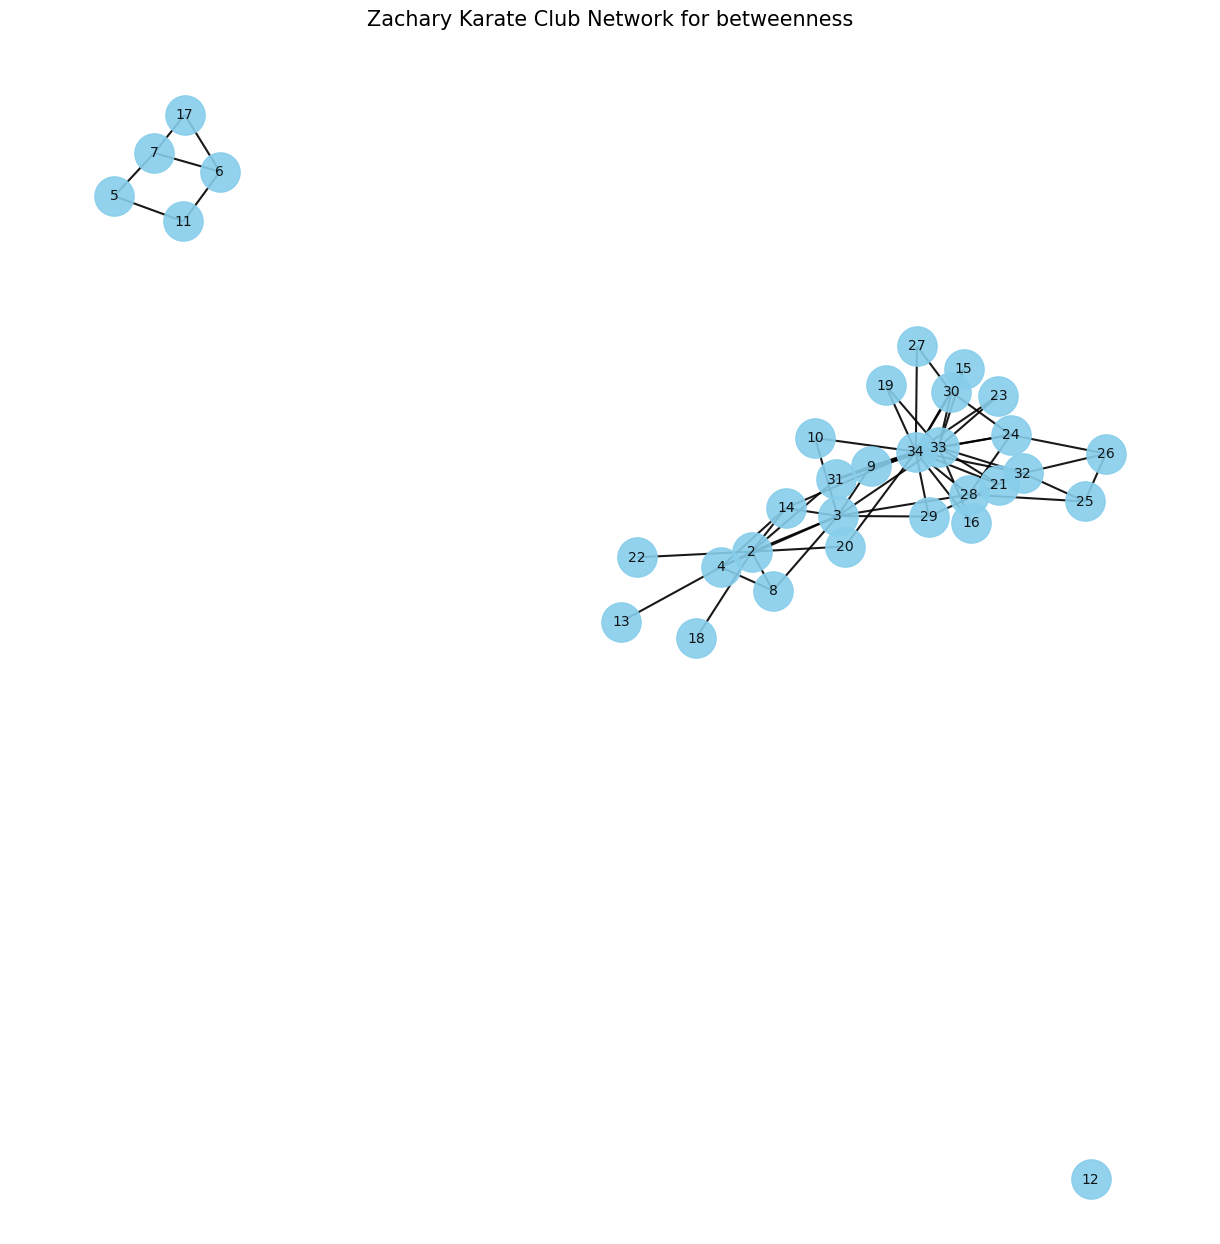


--- Removal by Betweenness Centrality ---
Removed nodes (in order): [(1, 0.43763528138528146)]
Final components: [{2, 3, 4, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}, {5, 6, 7, 11, 17}, {12}]


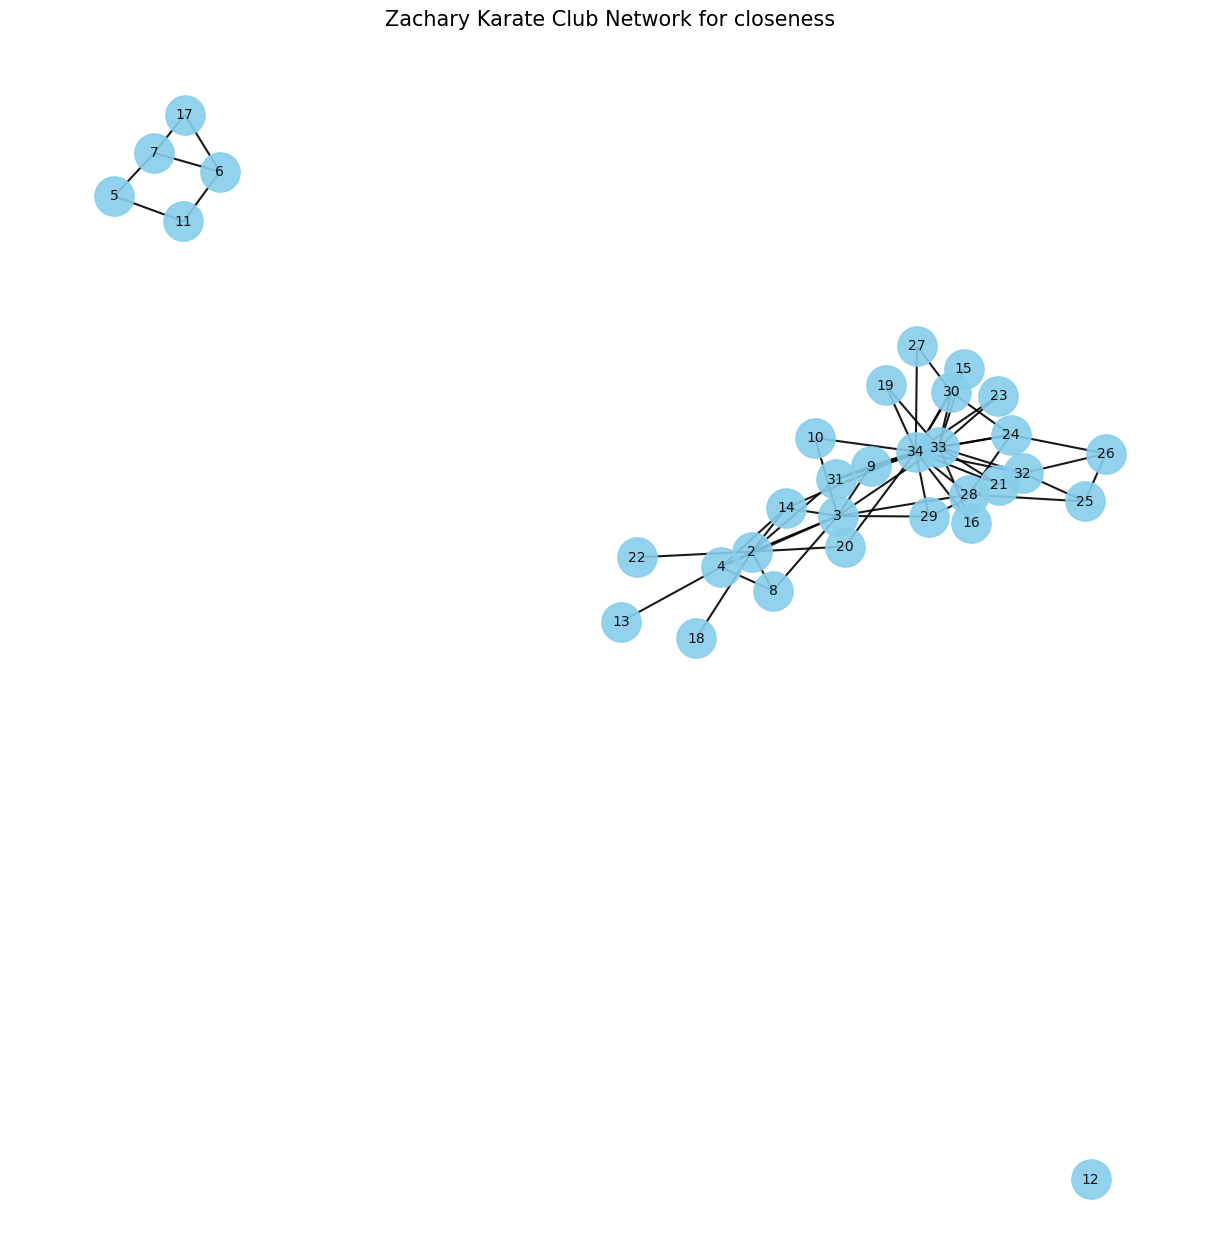


--- Removal by Closeness Centrality ---
Removed nodes (in order): [(1, 0.5689655172413793)]
Final components: [{2, 3, 4, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}, {5, 6, 7, 11, 17}, {12}]


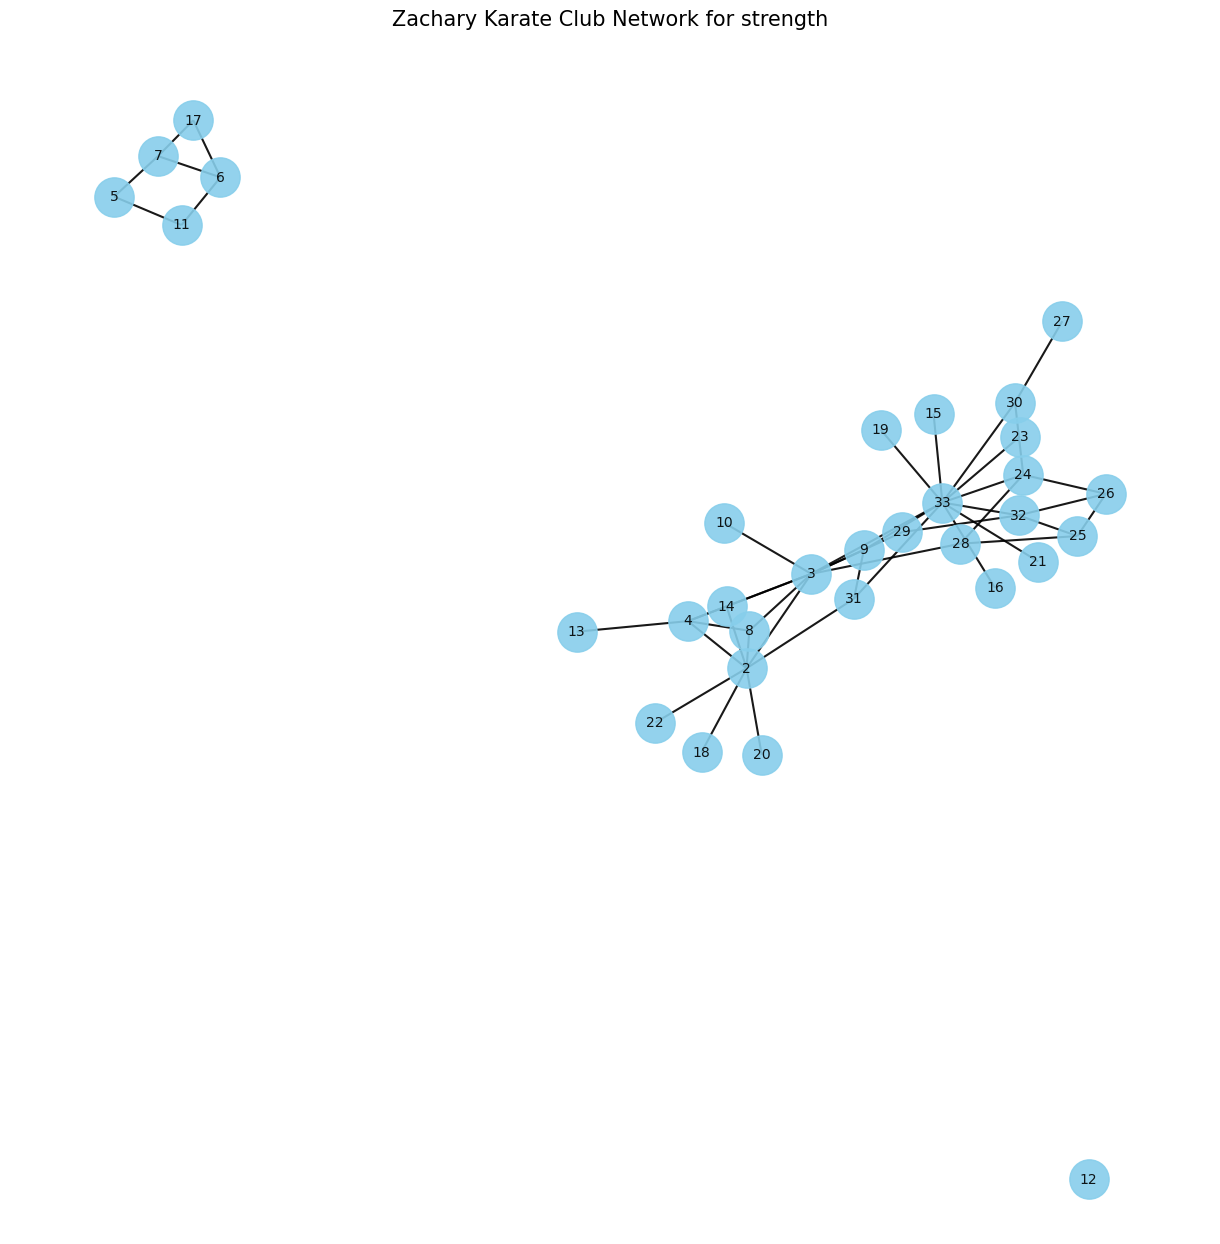


--- Removal by Strength Centrality ---
Removed nodes (in order): [(34, 17), (1, 16)]
Final components: [{2, 3, 4, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {5, 6, 7, 11, 17}, {12}]


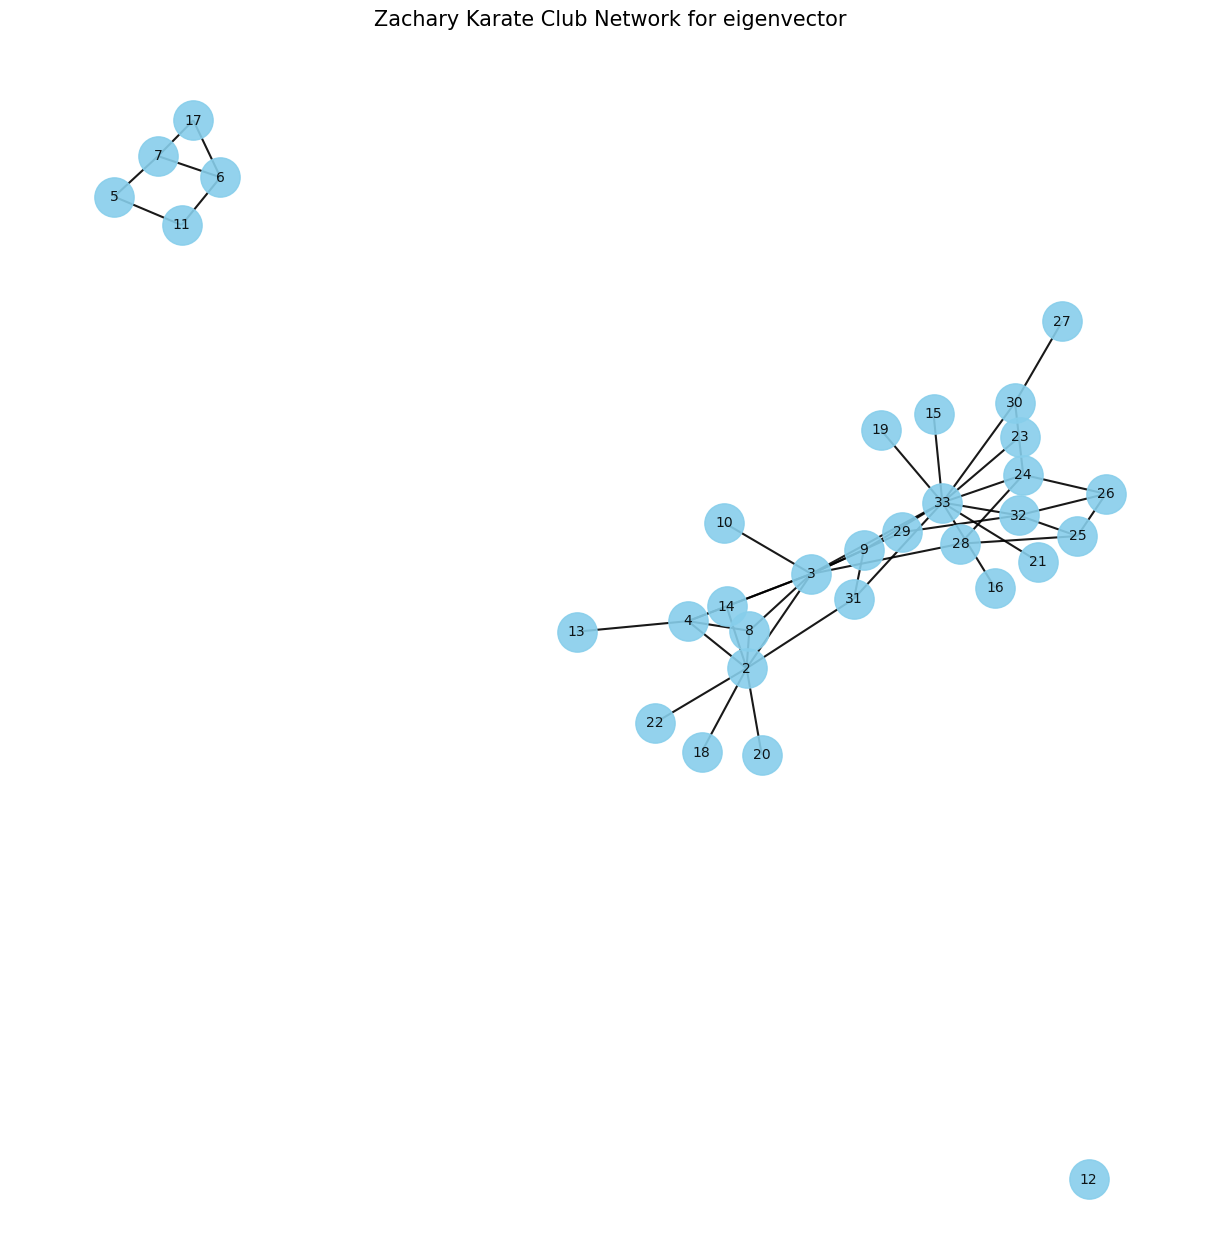


--- Removal by Eigenvector Centrality ---
Removed nodes (in order): [(34, 0.373363470291483), (1, 0.4920665030805586)]
Final components: [{2, 3, 4, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {5, 6, 7, 11, 17}, {12}]


In [32]:
# Combine vertex centralities into a DataFrame
import pandas as pd

vertex_centralities = pd.DataFrame({
    "betweenness": vertex_betweenness,
    "closeness": vertex_closeness,
    "strength": vertex_strength,
    "eigenvector": vertex_eig
}).sort_index()


def remove_nodes_until_two_components(G, centrality_dict, label):
    G_copy = G.copy()
    removed_nodes = []
    while nx.number_connected_components(G_copy) < 2:
        max_node = max(centrality_dict, key=centrality_dict.get)
        removed_nodes.append((max_node, centrality_dict[max_node]))
        G_copy.remove_node(max_node)
        
        if label == "betweenness":
            centrality_dict = nx.betweenness_centrality(G_copy)
        elif label == "closeness":
            centrality_dict = nx.closeness_centrality(G_copy)
        elif label == "strength":
            centrality_dict = dict(G_copy.degree(weight="weight"))
        elif label == "eigenvector":
            try:
                centrality_dict = nx.eigenvector_centrality(G_copy, max_iter=1000)
            except nx.NetworkXException:
                break
        else:
            break
    visualize_graph(G_copy,label)        
    components = list(nx.connected_components(G_copy))
    return removed_nodes, components


for label, centrality_dict in [
    ("betweenness", vertex_betweenness),
    ("closeness", vertex_closeness),
    ("strength", vertex_strength),
    ("eigenvector", vertex_eig)
]:
    removed, comps = remove_nodes_until_two_components(G, centrality_dict, label)
    print(f"\n--- Removal by {label.capitalize()} Centrality ---")
    print("Removed nodes (in order):", removed)
    print("Final components:", comps)

        
        


## Question 2
*Eulerian Trail*:  
A path that traverses each link (or edge) exactly once is called an Eulerian Trail.

*Eulerian Circuit*:  
A circuit is defined as a trail(does not pass over the same edge twice) that begins and ends at the same vertex. A connected graph is an **Eulerian cirucit** if there exists a circuit **using every edge** exactly once.



In [ ]:

is_eulerian_circuit = nx.is_eulerian(G)
is_eulerian_trail = nx.has_eulerian_path(G)

print("Eulerian Circuit:", is_eulerian_circuit)
print("Eulerian Trail:",is_eulerian_trail)

odd_degree_nodes = [node for node, degree in G.degree() if degree % 2 != 0]
print(f"There are {len(odd_degree_nodes)} vertices with an odd degree.")
print("Odd-degree vertices:", odd_degree_nodes)

Eulerian Circuit: False
Eulerian Trail: False
There are 12 vertices with an odd degree.
Odd-degree vertices: [2, 5, 9, 11, 12, 14, 20, 24, 26, 25, 29, 34]


As can be noticed from the output just obtained, both Eulerian trail and Eulerian circuit don't exist. The reason is, the Zachary Karrate Clubs has **more than two** vertices with odd degree.

Now, to create an *Eulerian Circuit* it must be ensured that every vertex's degree is **even**. 

On the other hand, for an *Eulerian Trail* to exist, it must be ensured that the network has either 0 odd-degree vertices or exactly 2 odd-degree vertices. If there are no odd-degree vertices, then we can start at any vertex and end at any other vertex, covering each edge exactly once. If there are exactly 2 odd-degree vertices, we can start at any one of the odd-degree vertices and end at the other odd-degree vertex.

Modifications to be made for either Eulerian trail or Eulerian Circuit:

1. For Eulerian Circuit:
The most efficient way is to pair-up *all* the *odd-degree* vertices and add an edge between each pair.
Since adding an edge will increase the degree of two vertices by one, connecting two odd-degree vertices makes both of them even-degree.

2. For Eulerian Trail:
We can choose two nodes that we want to be at the start and end of the trail. They will be left as it is. Then, pair-up the *rest* of the nodes and add edges between them.

### Californian Sparrow Flock